# Import Libraries

In [1]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import GradientBoostingClassifier
from imblearn.over_sampling import SMOTE
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, roc_auc_score
from sklearn.model_selection import cross_val_score


# Load the dataset

In [2]:
churn_model= pd.read_csv('Churn_Modelling.csv')

# Data Exploration

In [3]:
churn_model

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [4]:
churn_model = churn_model.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1)

In [5]:
churn_model 

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [6]:
print(churn_model.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  object 
 2   Gender           10000 non-null  object 
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 859.5+ KB
None


In [7]:
print(churn_model.describe())

        CreditScore           Age        Tenure        Balance  NumOfProducts  \
count  10000.000000  10000.000000  10000.000000   10000.000000   10000.000000   
mean     650.528800     38.921800      5.012800   76485.889288       1.530200   
std       96.653299     10.487806      2.892174   62397.405202       0.581654   
min      350.000000     18.000000      0.000000       0.000000       1.000000   
25%      584.000000     32.000000      3.000000       0.000000       1.000000   
50%      652.000000     37.000000      5.000000   97198.540000       1.000000   
75%      718.000000     44.000000      7.000000  127644.240000       2.000000   
max      850.000000     92.000000     10.000000  250898.090000       4.000000   

         HasCrCard  IsActiveMember  EstimatedSalary        Exited  
count  10000.00000    10000.000000     10000.000000  10000.000000  
mean       0.70550        0.515100    100090.239881      0.203700  
std        0.45584        0.499797     57510.492818      0.402769 

In [8]:
# Check for missing values
print(churn_model.isnull().sum())

CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64


In [9]:
# Check the distribution of the target variable
print(churn_model['Exited'].value_counts(normalize=False))

Exited
0    7963
1    2037
Name: count, dtype: int64


# Exploring Categorical Variables

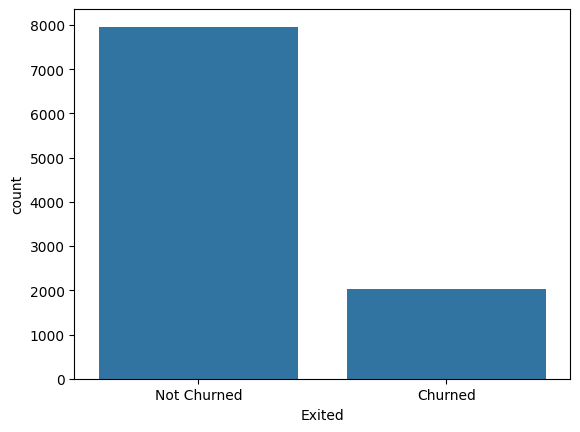

In [10]:
# Visualize the distribution
sns.countplot(x='Exited', data=churn_model)
plt.xticks(ticks=[0, 1], labels=['Not Churned', 'Churned'])
plt.show()

Geography
France     5014
Germany    2509
Spain      2477
Name: count, dtype: int64


<Axes: xlabel='Geography', ylabel='count'>

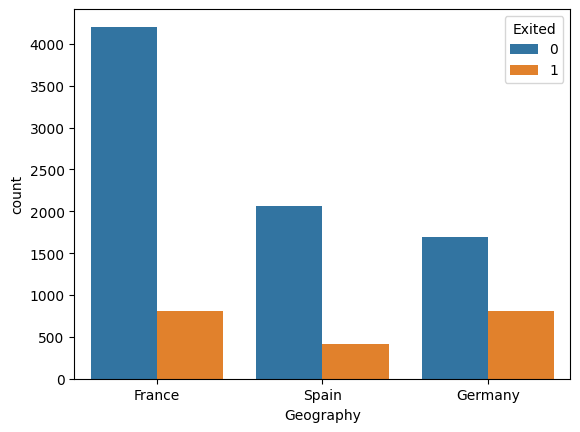

In [11]:
# Distribution of Geography and Gender
print(churn_model['Geography'].value_counts())


# Visualize the distribution
sns.countplot(x='Geography', hue='Exited', data=churn_model)


Gender
Male      5457
Female    4543
Name: count, dtype: int64


<Axes: xlabel='Gender', ylabel='count'>

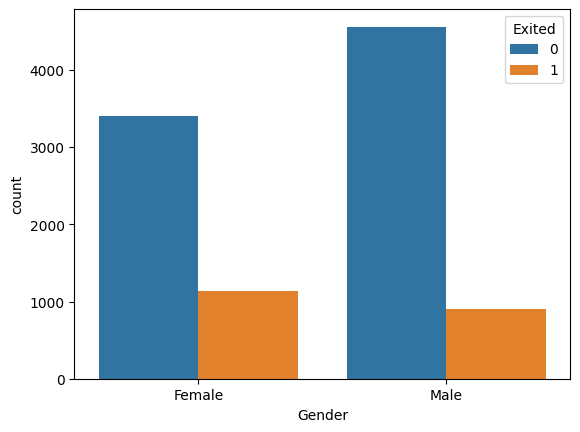

In [12]:
print(churn_model['Gender'].value_counts())
sns.countplot(x='Gender', hue='Exited', data=churn_model)

# Exploring Numerical Variables

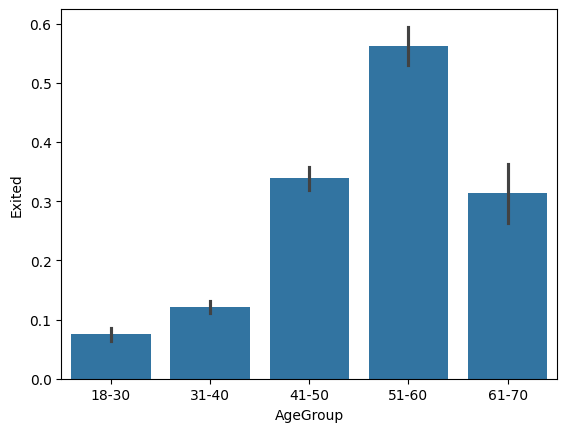

In [13]:
# Churn rate by age group
churn_model['AgeGroup'] = pd.cut(churn_model['Age'], bins=[18, 30, 40, 50, 60, 70], labels=['18-30', '31-40', '41-50', '51-60', '61-70'])
sns.barplot(x='AgeGroup', y='Exited', data=churn_model)
plt.show()

# Encode categorical variables

In [14]:

gender_encoder = LabelEncoder()
geography_encoder = LabelEncoder()
churn_model['Gender'] = gender_encoder.fit_transform(churn_model['Gender'])
churn_model['Geography'] = geography_encoder.fit_transform(churn_model['Geography'])

# Define features and target

In [15]:
X = churn_model.drop(['Exited','AgeGroup'], axis=1)
y = churn_model['Exited']

In [16]:
X

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,0,0,42,2,0.00,1,1,1,101348.88
1,608,2,0,41,1,83807.86,1,0,1,112542.58
2,502,0,0,42,8,159660.80,3,1,0,113931.57
3,699,0,0,39,1,0.00,2,0,0,93826.63
4,850,2,0,43,2,125510.82,1,1,1,79084.10
...,...,...,...,...,...,...,...,...,...,...
9995,771,0,1,39,5,0.00,2,1,0,96270.64
9996,516,0,1,35,10,57369.61,1,1,1,101699.77
9997,709,0,0,36,7,0.00,1,0,1,42085.58
9998,772,1,1,42,3,75075.31,2,1,0,92888.52


In [17]:
y

0       1
1       0
2       1
3       0
4       0
       ..
9995    0
9996    0
9997    1
9998    1
9999    0
Name: Exited, Length: 10000, dtype: int64

## Data Preprocessing, Balancing with SMOTE, and Model Training with Gradient Boosting Classifier

In [18]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [19]:
scaler = StandardScaler()

In [20]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [21]:
# Apply SMOTE to handle class imbalance
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)


In [22]:
# Initialize the GradientBoost model
gb_model = GradientBoostingClassifier(random_state=42)

In [23]:
# Train the model on the resampled training data
gb_model.fit(X_train_resampled, y_train_resampled)

GradientBoostingClassifier(random_state=42)

In [24]:
# Make predictions on the test set
y_pred = gb_model.predict(X_test)

In [25]:
# Generate and print the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

In [26]:
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

In [27]:
# Print the best parameters, best ROC-AUC score, accuracy, and classification report
print("Accuracy on Test Set:", accuracy)


Accuracy on Test Set: 0.834


In [28]:
# Confusion matrix and classification report
conf_matrix = confusion_matrix(y_test, y_pred)
print(f'Confusion Matrix:\n{conf_matrix}')

classification_report_str = classification_report(y_test, y_pred, target_names=['Not Churned', 'Churned'])
print(f'Classification Report:\n{classification_report_str}')


Confusion Matrix:
[[1401  206]
 [ 126  267]]
Classification Report:
              precision    recall  f1-score   support

 Not Churned       0.92      0.87      0.89      1607
     Churned       0.56      0.68      0.62       393

    accuracy                           0.83      2000
   macro avg       0.74      0.78      0.76      2000
weighted avg       0.85      0.83      0.84      2000



In [29]:
cv_scores = cross_val_score(gb_model, X_train_resampled, y_train_resampled, cv=5, scoring='accuracy')
print(f'Cross-Validation Accuracy Scores: {cv_scores}')
print(f'Mean Cross-Validation Accuracy: {cv_scores.mean():.4f}')

Cross-Validation Accuracy Scores: [0.7640582  0.86629965 0.90243902 0.86978757 0.90047207]
Mean Cross-Validation Accuracy: 0.8606
